In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
from PIL import Image

In [ ]:
!pip install transformers torch

In [ ]:
#starting vision transformer here

import os
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from transformers import ViTForImageClassification, ViTFeatureExtractor


In [ ]:
# Define image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),     # Resize all images to 224x224
    transforms.ToTensor(),             # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize
])


In [ ]:
# Load the train and test datasets
train_data = datasets.ImageFolder(root="/content/drive/MyDrive/final_output_data/train", transform=transform)
test_data = datasets.ImageFolder(root="//content/drive/MyDrive/final_output_data/test", transform=transform)

# Use DataLoader to batch the data
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)


In [ ]:
import torch
from torchvision import models

# Load the pre-trained Vision Transformer model
model = models.vit_b_16(pretrained=True)  # 'vit_b_16' is a small ViT model

# Print the model architecture (optional)
print(model)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:06<00:00, 50.6MB/s]


VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [ ]:
import torch.nn as nn

# Modify the final layer for your dataset (assuming 10 classes, for MNIST)
model.heads = nn.Sequential(
    nn.LayerNorm(model.heads[0].in_features),
    nn.Linear(model.heads[0].in_features, 10)  # 10 classes for MNIST digits
)

# Check the modified model architecture
print(model)


VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the appropriate device
model = model.to(device)


In [ ]:
model.train()  # Set the model to training mode

VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [ ]:
criterion = nn.CrossEntropyLoss()


In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)


In [ ]:
num_epochs = 5  # You can adjust this based on how long you want to train

# Loop over the dataset multiple times
for epoch in range(num_epochs):
    model.train()  # Ensure the model is in training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:  # Ensure your train_loader is defined
        # Move images and labels to the correct device (GPU or CPU)
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero out gradients from the previous step

        # Forward pass: Get model predictions
        outputs = model(images)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass: Compute gradients
        loss.backward()

        # Optimize (update the model's weights)
        optimizer.step()

        # Track statistics
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Calculate and print the loss and accuracy for this epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = (correct / total) * 100
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")


Epoch [1/5], Loss: 0.8034, Accuracy: 71.93%
Epoch [2/5], Loss: 0.1655, Accuracy: 94.85%
Epoch [3/5], Loss: 0.0708, Accuracy: 98.11%
Epoch [4/5], Loss: 0.0522, Accuracy: 98.38%
Epoch [5/5], Loss: 0.0478, Accuracy: 98.54%


Accuracy on the test set: 96.53%

Confusion Matrix:
[[520   0   6   3   1   1   0   0]
 [ 11 692  38   0   3   0   5   0]
 [  1   0 558   6   0   0   0   1]
 [ 12   1   7 414   8   4   0   0]
 [  0   1  10   2 480   0   0   0]
 [  0   0   3   0   1 587   0   0]
 [  1   0   8   2   0   0 619   0]
 [  0   0   0   6   0   0   0  85]]


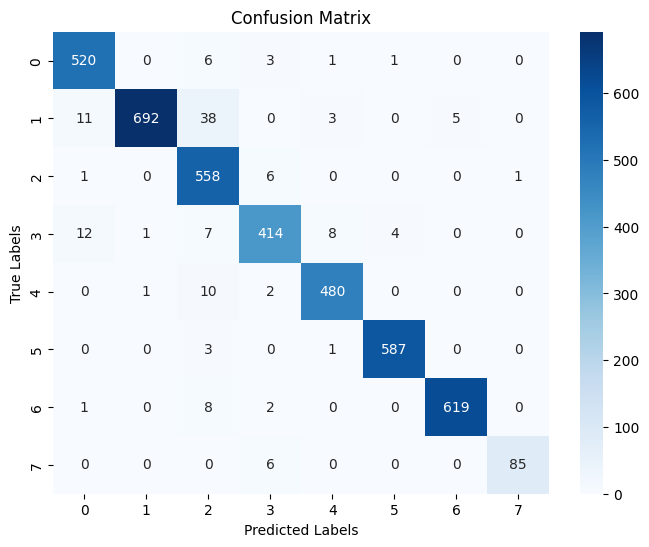


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       531
           1       1.00      0.92      0.96       749
           2       0.89      0.99      0.93       566
           3       0.96      0.93      0.94       446
           4       0.97      0.97      0.97       493
           5       0.99      0.99      0.99       591
           6       0.99      0.98      0.99       630
           7       0.99      0.93      0.96        91

    accuracy                           0.97      4097
   macro avg       0.97      0.96      0.96      4097
weighted avg       0.97      0.97      0.97      4097



In [ ]:
#Calculate all metrics - testing
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import torch

# Collect true and predicted labels
y_true = []
y_pred = []

model.eval()  # Set the model to evaluation mode (turn off dropout layers)

with torch.no_grad():  # No need to calculate gradients during evaluation
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Append true and predicted labels for later metric calculations
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Calculate accuracy (same as before)
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy on the test set: {accuracy * 100:.2f}%')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot confusion matrix (optional)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Calculate precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

In [ ]:
#Save the model
import torch
import os

# Specify your custom directory path
custom_save_dir = '/content/drive/MyDrive/saved_models'  # Example path for Google Drive in Colab

# Create the directory if it doesn't exist
os.makedirs(custom_save_dir, exist_ok=True)

# Define the full path with the file name
save_path = os.path.join(custom_save_dir, 'vit_model.pth')

# Save the model to the specified path
torch.save(model.state_dict(), save_path)
print(f"Model saved successfully at {save_path}!")


Model saved successfully at /content/drive/MyDrive/saved_models/vit_model.pth!


In [ ]:
import torch
from torchvision import models

# Load the Vision Transformer model and specify the number of classes
model = models.vit_b_16(weights=None)  # Set weights=None or specify pre-trained weights if needed
model.heads.head = torch.nn.Linear(model.heads.head.in_features, 8)  # Adjust to the correct number of classes

# Load saved model weights
try:
    model.load_state_dict(torch.load('/content/drive/MyDrive/saved_models/vit_model.pth'))
    model.eval()  # Set model to evaluation mode
    print("Model loaded and set to evaluation mode.")
except RuntimeError as e:
    print(f"Error loading model state_dict: {e}")


Error loading model state_dict: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.


<ipython-input-25-c0ffa7abd4a3>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/saved_models/vit_model.pth'))


In [ ]:
# Load and Transform the Single Image:
# Load the image
img_path = '/content/drive/MyDrive/WhatsApp Image 2024-11-13 at 12.12.42.jpeg'  # Replace with your image path
img = Image.open(img_path).convert('RGB')

# Apply the transformations
img = transform(img).unsqueeze(0)  # Add batch dimension


In [ ]:
# Pass the Image to the Model:
with torch.no_grad():
    output = model(img)
    _, predicted = torch.max(output, 1)
    print(f"Predicted class: {predicted.item()}")

Predicted class: 3


Predicted Emotion: Disgust


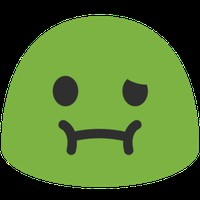

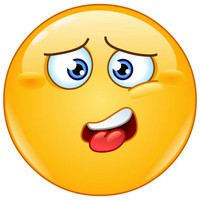

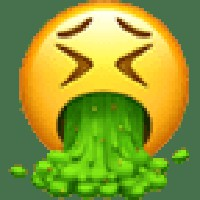

In [ ]:
import os
import random
from PIL import Image
from IPython.display import display
import torch

# Updated dictionary to map model's integer output to emotion folder names
label_to_emotion = {
    0: "happy",
    1: "sad",
    2: "surprise",
    3: "disgust",
    4: "fear",
    5: "angry",
    6: "uncertain",
    7: "noemotion"
}

# Map each emotion to its corresponding emoji folder path
emotion_to_folder = {
    "happy": "/content/drive/MyDrive/Emoji Dataset/Happy",
    "sad": "/content/drive/MyDrive/Emoji Dataset/Sad ",
    "surprise": "/content/drive/MyDrive/Emoji Dataset/Surprise",
    "disgust": "/content/drive/MyDrive/Emoji Dataset/Disgust",
    "fear": "/content/drive/MyDrive/Emoji Dataset/Fear",
    "angry": "/content/drive/MyDrive/Emoji Dataset/Angry",
    #"uncertain": "path/to/emoji_database/uncertain",
    #"noemotion": "path/to/emoji_database/noemotion"
}

# Function to get paths of three random emojis based on the model's predicted label
def get_emoji_paths(predicted_label, num_emojis=3):
    predicted_emotion = label_to_emotion[predicted_label]
    folder_path = emotion_to_folder.get(predicted_emotion, "default/folder")
    emoji_files = os.listdir(folder_path)

    # Select three random emojis (if fewer than three are available, select all)
    selected_emojis = random.sample(emoji_files, min(num_emojis, len(emoji_files)))
    emoji_paths = [os.path.join(folder_path, emoji) for emoji in selected_emojis]
    return predicted_emotion, emoji_paths

# Load and preprocess your input image here (as 'img')
# Example (replace with your actual image preprocessing code):
# img = preprocess_image(your_image_path)

# Prediction: Pass the Image to the Model
with torch.no_grad():
    output = model(img)  # Assuming img is the preprocessed image tensor
    _, predicted = torch.max(output, 1)
    predicted_label = predicted.item()  # Get the predicted integer label

# Get the predicted emotion and the paths of the three corresponding emojis
predicted_emotion, emoji_paths = get_emoji_paths(predicted_label)

# Display the predicted emotion
print(f"Predicted Emotion: {predicted_emotion.capitalize()}")

# Display the emojis in Colab
for emoji_path in emoji_paths:
    emoji_image = Image.open(emoji_path)
    display(emoji_image)
